In [1]:
# Third party imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
from sklearn.cluster import KMeans
from sklearn import datasets


In [2]:
# Load as DataFrame directly
df = datasets.load_iris(as_frame=True)["data"]


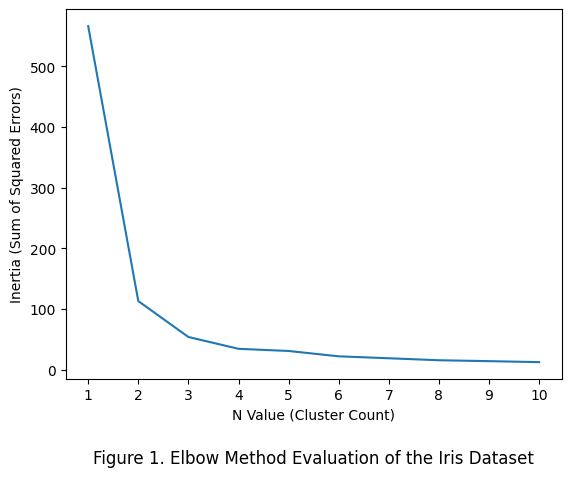

In [3]:
# Assignment: エルボー法

def elbow_method(df, n_max):
    """Evaluate optimal cluster count from range of n_max given dataset df."""

    # Setup.
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    # Initialize.
    n = range(1, n_max + 1)
    inertias = []

    for i in n:
        km = KMeans(i)
        km_result = km.fit(df[[df.columns[0], df.columns[2]]])

        # Append the inertia (SSE: Sum of Squared Errors)
        inertias.append(km_result.inertia_)

    # Plot.
    ax.plot(n, inertias)
    ax.set_title("Figure 1. Elbow Method Evaluation of the Iris Dataset", y=-0.25)
    ax.set_xlabel("N Value (Cluster Count)")
    ax.set_ylabel("Inertia (Sum of Squared Errors)")
    plt.show()

elbow_method(df, 10)


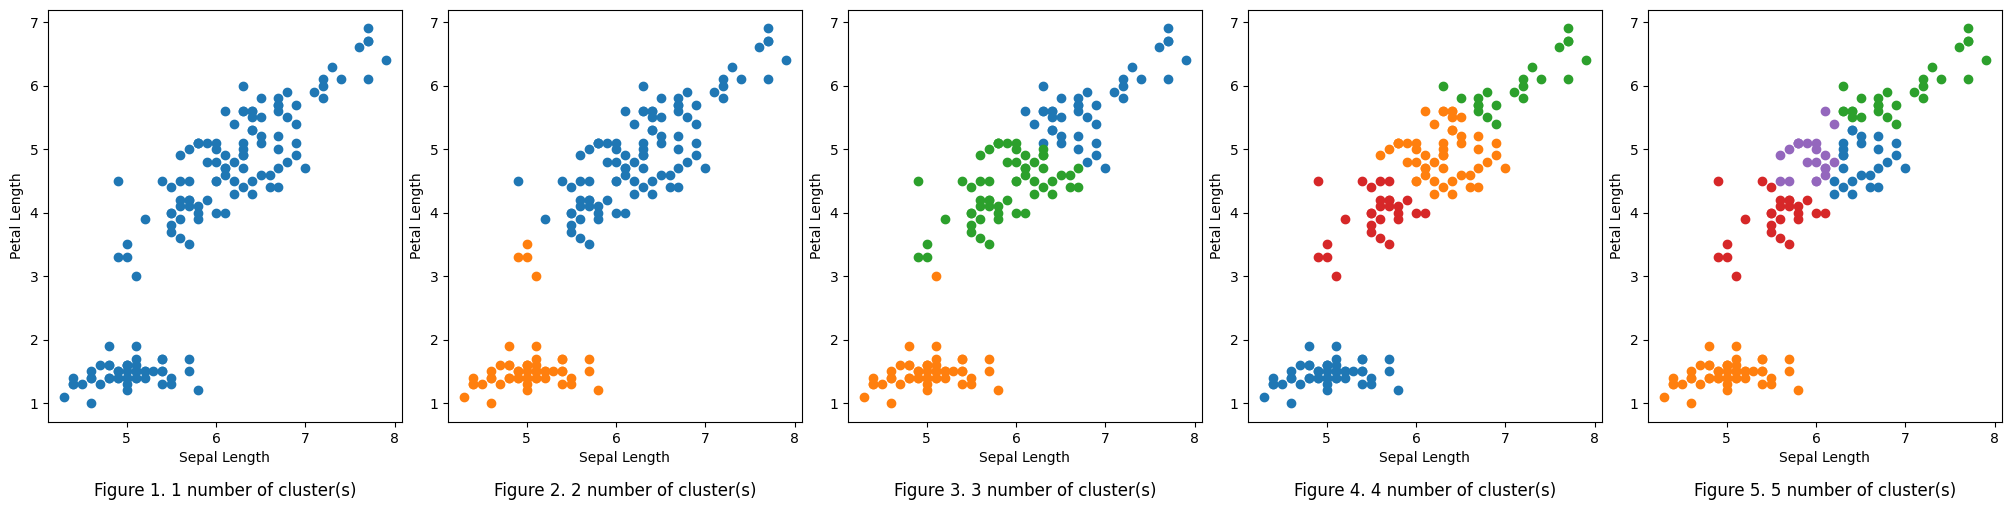

In [4]:
# Challenge: K-meansのkパラメータを調整

def observe_k_parameter(df, n_max):
    """Generate graphs showing all clusters from 1 to n_max number of clusters."""

    # Setup.
    n = range(n_max)
    fig, axs = plt.subplots(1, n_max, figsize=(20, 5), layout="constrained")

    for i in n:
        ax = axs[i]
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        i += 1

        # Get results.
        km = KMeans(n_clusters=i)
        km_result = km.fit_predict(df[[df.columns[0], df.columns[2]]])
        df["km_4_result"] = km_result

        for j in np.sort(df["km_4_result"].unique()):
            ax.scatter(
                df[df["km_4_result"] == j][df.columns[0]],
                df[df["km_4_result"] == j][df.columns[2]],
            )

        # Give descriptive title for readability.
        ax.set_title(f"Figure {i}. {i} number of cluster(s)", y=-0.2)
        ax.set_xlabel("Sepal Length")
        ax.set_ylabel("Petal Length")

    plt.show()

observe_k_parameter(df, 5)


In [5]:
# Challenge: LBGによるクラスタリング（関数）

def lbg(df, epsilon=0.01, threshold=2):
    pass
#     centroids = [Point(df[df.columns[0]].mean(), df[df.columns[2]].mean())]
#     offset_point = Point(0, 1 * epsilon)
#     prev_sse = None
#     while True:
#         if prev_sse and prev_sse <= threshold:
#             break

#         new_centroids = []
#         for centroid in centroids:
#             new_centroids.extend([
#                 centroid + offset_point,
#                 centroid - offset_point
#             ])
#         centroids = new_centroids

#         centroid_distances = {
#             centroid:
#             [centroid.distance_to(get_x(i), get_y(i)) for i in range(len(df))]
#             for centroid in centroids
#         }

#         c_df = pd.DataFrame(centroid_distances)
#         min_distance_to_centroids = c_df.idxmin(axis=1).to_dict()

#         sse = sum(c_df.min(axis=1)) / len(c_df)

#         df["closest_centroid"] = df.index.map(min_distance_to_centroids)
#         new_points = df.groupby(["closest_centroid"], sort=False).mean()[[df.columns[0], df.columns[2]]]

#         if sse <= threshold:
#             plt.figure()
#             new_points.plot.scatter(x=df.columns[0], y=df.columns[2])
#             df.plot.scatter(x=df.columns[0], y=df.columns[2])
#             return

#         updated_centroids = []
#         for _, data in new_points.iterrows():
#             updated_centroids.append(Point(data[df.columns[0]], data[df.columns[2]]))

#         print(updated_centroids)
#         centroids = updated_centroids

# lbg(df)


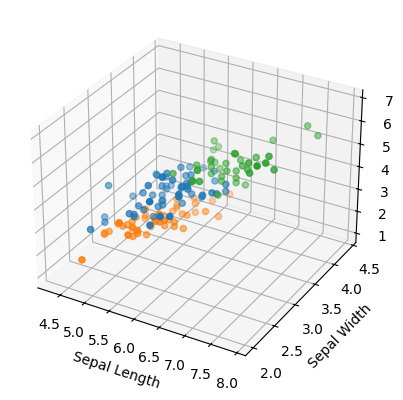

In [6]:
# Challenge: ３次元データの分類

# K-means.
km_3 = KMeans(n_clusters=3, max_iter=30)
km_3_result = km_3.fit_predict(df[[df.columns[0], df.columns[2]]])

# Plot.
fig = plt.figure()
df["km_3_result"] = km_3_result

ax = fig.add_subplot(projection="3d")

# Plot in 3d.
for i in np.sort(df["km_3_result"].unique()):
    ax.scatter3D(
        df[df["km_3_result"] == i][df.columns[0]],
        df[df["km_3_result"] == i][df.columns[1]],
        df[df["km_3_result"] == i][df.columns[2]]
    )

# Set labels for readability.
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")

plt.show()


C1
 (x: 5.0055555555555555, y: 1.5962962962962963)
C2
 (x: 6.314583333333331, y: 4.973958333333335)


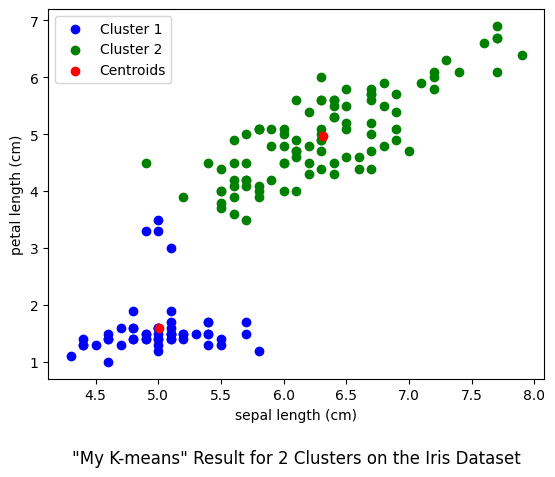

In [7]:
# Challenge: K-meansを関数なしで実現

# Base imports
import math
import random

# Third party imports
import matplotlib.pyplot as plt

class Point:
    """The point is that everyone loves object oriented programming!"""

    def __init__(self, x = None, y = None):
        """Constructor.
        If no points are specified then give assign integers to the x and y points.
        """
        self.x = x if x else randint()
        self.y = y if y else randint()

    def distance_to(self, x, y):
        """Calculates the distance from self to (x, y) parameters."""
        return math.sqrt((self.x - x) ** 2 + (self.y - y) ** 2)

    def __add__(self, other):
        """Add two points and return a new Point instance."""
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        """Subtract two points and return a new Point instance."""
        return Point(self.x - other.x, self.y - other.y)

    def divide(self, divider):
        """Divide two points and return a new Point instance."""
        return Point(self.x / divider, self.y / divider)

    def __repr__(self):
        """Returns string representation of the Point instance."""
        return f"(x: {self.x}, y: {self.y})"

# Helper lambda functions.
get_x = lambda i: df['sepal length (cm)'][i]
get_y = lambda i: df['petal length (cm)'][i]
randint = lambda: random.randint(1, 10)

def simple_k_means(df, visualize = False):
    """My K-means function for 2 cluster classfication."""

    # Initialize variables.
    prev_sse = None
    c1 = Point()
    c2 = Point()

    # Loop until condition is satisfied.
    while True:
        # Get list of all distances to centroids C1 and C2.
        distances_to_c1 = [c1.distance_to(get_x(i), get_y(i)) for i in range(len(df))]
        distances_to_c2 = [c2.distance_to(get_x(i), get_y(i)) for i in range(len(df))]

        # Determine which point is the closest to either of centroids C1 and C2.
        closest_to_dict = {i: "c1" if distances_to_c1[i] < distances_to_c2[i] else "c2" for i in range(len(df))}

        x_coords_closest_to_c1 = [get_x(i) for i in range(len(df)) if closest_to_dict[i] == "c1"]
        y_coords_closest_to_c1 = [get_y(i) for i in range(len(df)) if closest_to_dict[i] == "c1"]
        x_coords_closest_to_c2 = [get_x(i) for i in range(len(df)) if closest_to_dict[i] == "c2"]
        y_coords_closest_to_c2 = [get_y(i) for i in range(len(df)) if closest_to_dict[i] == "c2"]

        # Calculate SSE (Squared Sum of Errors) for both centroids C1 and C2.
        c1_sse = sum([element ** 2 for i, element in enumerate(distances_to_c1) if closest_to_dict[i] == "c1"])
        c2_sse = sum([element ** 2 for i, element in enumerate(distances_to_c2) if closest_to_dict[i] == "c2"])
        sse = c1_sse + c2_sse

        # Check for base case.
        if prev_sse is not None and math.isclose(prev_sse, sse):
            if visualize:
                print("C1\n", c1)
                print("C2\n", c2)

                # Plot the data.
                fig = plt.figure()
                ax = fig.add_subplot()
                ax.scatter(x_coords_closest_to_c1, y_coords_closest_to_c1, color="blue", label="Cluster 1")
                ax.scatter(x_coords_closest_to_c2, y_coords_closest_to_c2, color="green", label="Cluster 2")
                ax.scatter([c1.x, c2.x], [c1.y, c2.y], color="red", label="Centroids")

                ax.set_title("\"My K-means\" Result for 2 Clusters on the Iris Dataset", y=-0.25)
                ax.set_xlabel("sepal length (cm)")
                ax.set_ylabel("petal length (cm)")
                ax.legend()

                plt.show()

            # Break out of the loop.
            break

        # One can imagine an edge case where all points are the closest to only one centroid.
        # This can cause a ZeroDivisionError.
        # As a safety measure new random points will be given to centroids C1 and C2.
        try:
            new_c1_x = sum(x_coords_closest_to_c1) / len(x_coords_closest_to_c1)
            new_c1_y = sum(y_coords_closest_to_c1) / len(y_coords_closest_to_c1)
            new_c2_x = sum(x_coords_closest_to_c2) / len(x_coords_closest_to_c2)
            new_c2_y = sum(y_coords_closest_to_c2) / len(y_coords_closest_to_c2)
        except ZeroDivisionError:
            c1 = Point()
            c2 = Point()
            continue

        # Start over again with new centroid coordinates.
        prev_sse = sse
        c1 = Point(new_c1_x, new_c1_y)
        c2 = Point(new_c2_x, new_c2_y)

simple_k_means(df, visualize=True)
